In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

In [39]:
ins = pd.read_csv('insurance.csv')

In [3]:
ins.shape

(1338, 7)

In [4]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#check for missing values
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#5 point summary of numerical variables
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 720x360 with 0 Axes>

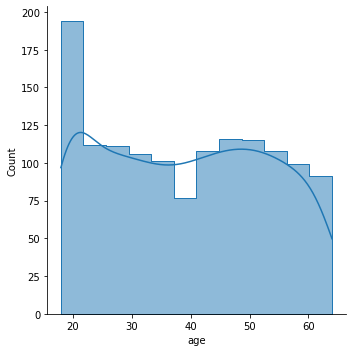

In [10]:
plt.figure(figsize=(10,5))
sns.displot(ins, x='age', kde=True, element='step')

# Measures of central tendency

    - Mean
    - Median
    - Mode

These measures of central tendencies tells us where most of the data is present. Mean is influenced by the outliers.

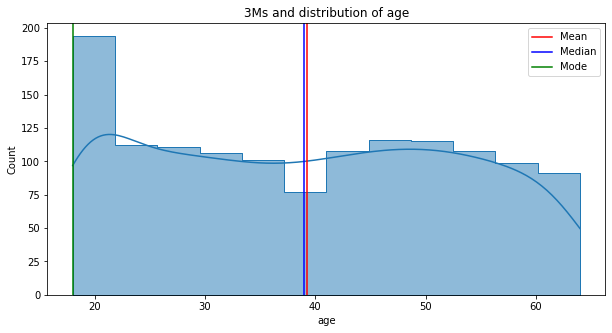

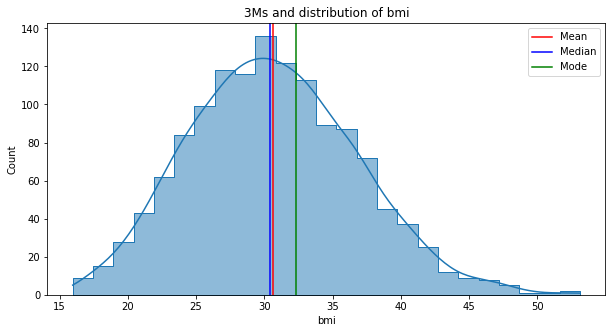

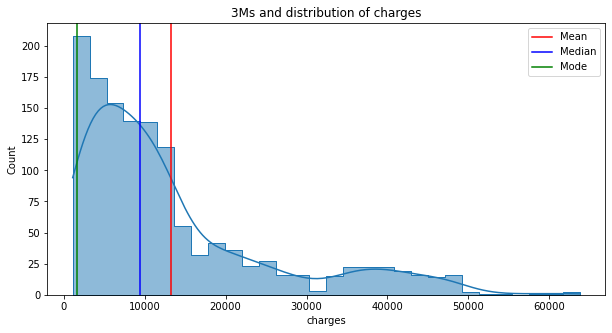

In [11]:
num_feat = ['age', 'bmi', 'charges']
for i in num_feat:
    i_mean = ins[i].mean()
    i_median = ins[i].median()
    i_mode = ins[i].mode()
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax = sns.histplot(data=ins, x=i, kde=True, element='step')
    ax.axvline(i_mean, color='r', label='Mean')
    ax.axvline(i_median, color='b', label='Median')
    ax.axvline(i_mode[0], color='g', label='Mode')
    ax.set_title("3Ms and distribution of {}".format(i))
    plt.legend()
    plt.show()

# Skewness

-skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution.<br>skewness tells us about class imbalance and direction of outliers.

In [12]:
for i in num_feat:
    print(f"Skewness of {i}: {ins[i].skew().round(3)}")

Skewness of age: 0.056
Skewness of bmi: 0.284
Skewness of charges: 1.516


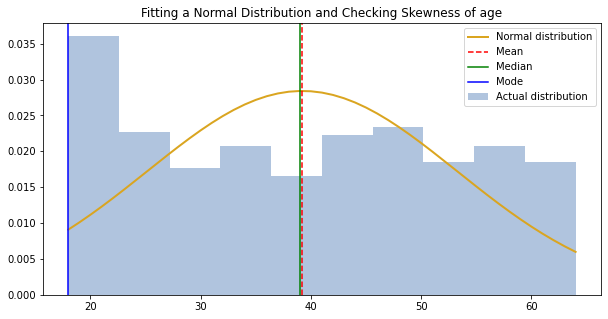

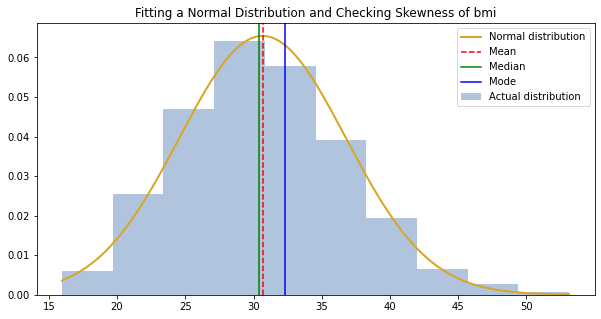

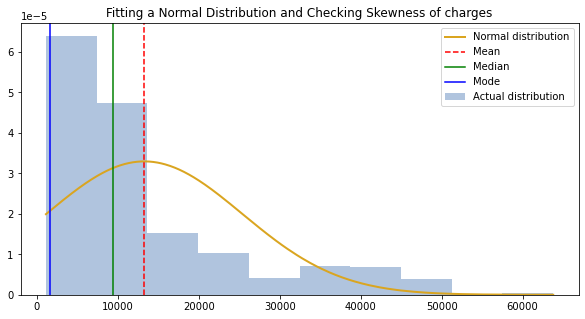

In [13]:
# Fitting a normal distribution and ploting the result
for i in num_feat:
    h = np.asarray(ins[i])
    h = sorted(h)
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
    fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
#plot both series on the histogram
    fig, ax_hist = plt.subplots(figsize = (10, 5))
    plt.plot(h, fit, '-', linewidth = 2, color = 'goldenrod', label = 'Normal distribution')
    plt.hist(h, density = True, color = 'lightsteelblue', label = 'Actual distribution')

    ax_hist.axvline(ins[i].mean(), color = 'r', linestyle = '--', label = 'Mean')
    ax_hist.axvline(ins[i].median(), color = 'g', linestyle = '-', label = 'Median')
    ax_hist.axvline(ins[i].mode()[0], color = 'b', linestyle = '-', label = 'Mode')
    ax_hist.set_title(f'Fitting a Normal Distribution and Checking Skewness of {i}')

    plt.legend(); plt.show()

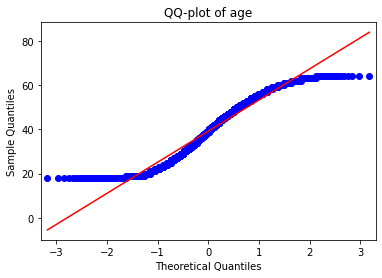

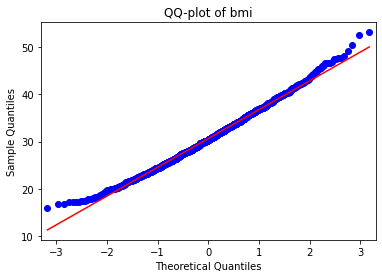

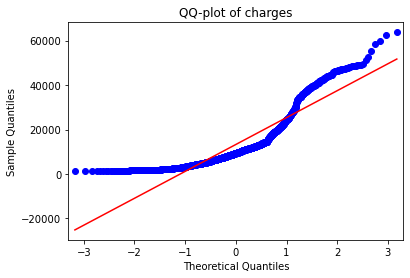

In [14]:
for i in num_feat:
    sm.qqplot(ins[i], line='s')
    plt.title(f"QQ-plot of {i}")
    plt.show()

Outliers in age


,age,sex,bmi,children,smoker,region,charges


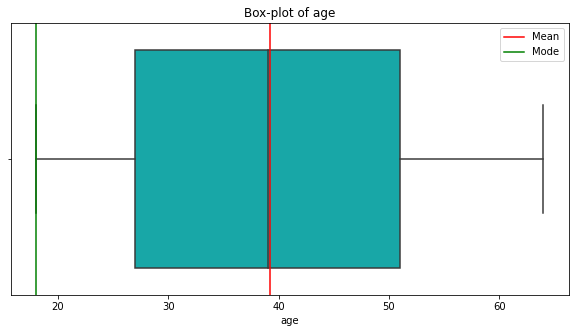

Outliers in bmi


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


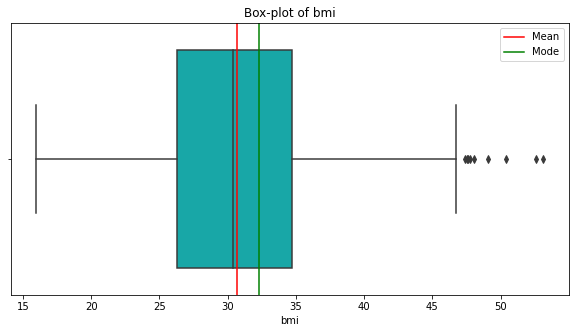

Outliers in charges


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


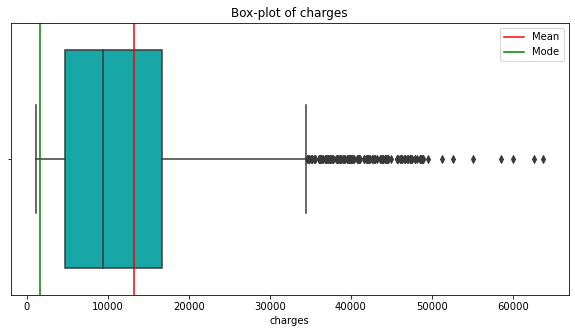

In [15]:
def disp_outlier(i):
    Q1, Q3 = np.quantile(ins[i], [0.25, 0.75])
    IQR = Q3-Q1
    print(f"Outliers in {i}")
    display(ins.loc[(ins[i]<(Q1-(1.5*IQR))) | (ins[i]>(Q3+(1.5*IQR)))])
    
for i in num_feat:
    disp_outlier(i)
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=i, data=ins, color='c')
    ax.axvline(ins[i].mean(), color='r', label='Mean')
    ax.axvline(ins[i].mode()[0], color='g', label='Mode')
    plt.title(f"Box-plot of {i}")
    plt.legend()
    plt.show()

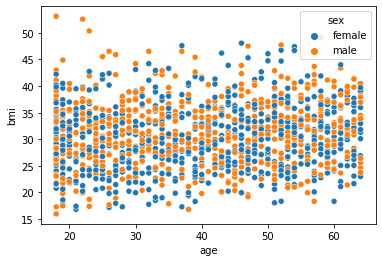

Correlation between 'age' and 'bmi' is  0.1092718815485352


In [16]:
sns.scatterplot(x='age', y='bmi', hue='sex', data=ins) 
#sns.lineplot(x='age', y='bmi', hue='sex', data=ins, ci=None) 
#sns.relplot(x='age', y='bmi', hue='sex', data=ins, kind='line')
plt.show()
print("Correlation between 'age' and 'bmi' is ",ins['age'].corr(ins['bmi']))

Correlation between 'age' and 'charges' is  0.29900819333064765


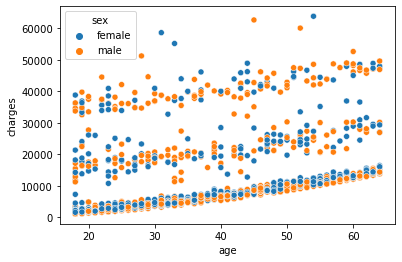

In [17]:
sns.scatterplot(x='age', y='charges', hue='sex', data=ins)
print("Correlation between 'age' and 'charges' is ", ins['age'].corr(ins['charges']))

<AxesSubplot:xlabel='age', ylabel='charges'>

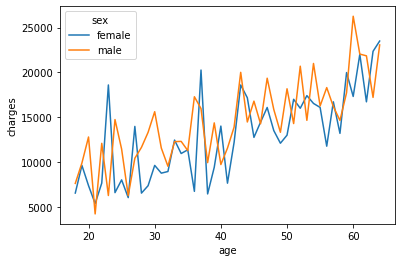

In [18]:
sns.lineplot(x='age', y='charges', hue='sex', data=ins, ci=None)

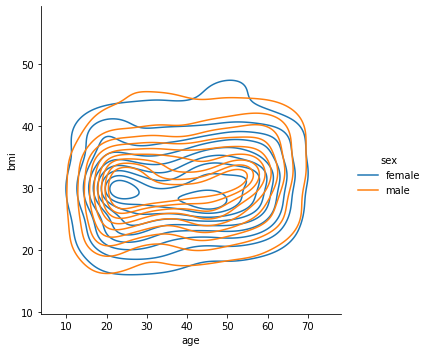

In [19]:
sns.displot(ins, x='age', y='bmi', kind='kde', hue='sex')

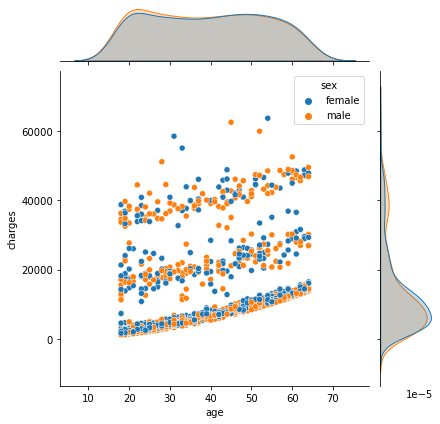

In [20]:
sns.jointplot(data= ins, x='age', y='charges', hue='sex')

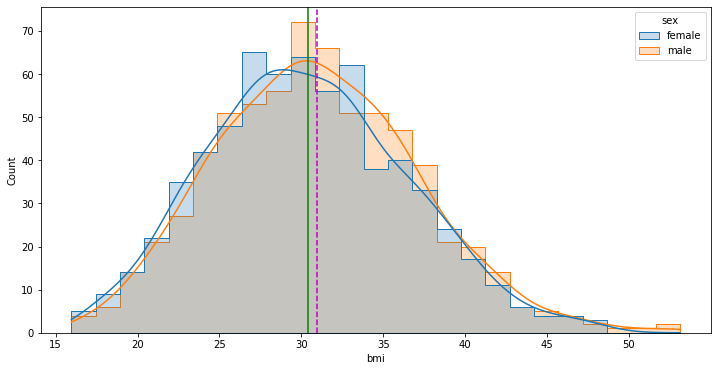

In [68]:
#bmi distribution for males and females
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ins, x='bmi', hue='sex', kde=True, element='step', ax= ax, multiple='layer')
ax.axvline(ins[ins['sex']=='female']['bmi'].mean(), linestyle='-', color='g')
ax.axvline(ins[ins['sex']=='male']['bmi'].mean(), linestyle='--', color='m')

In [21]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

30.377749244713023

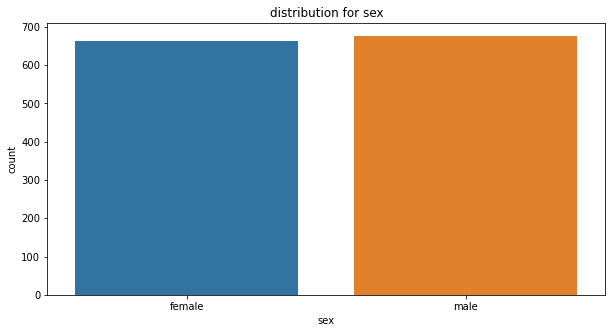

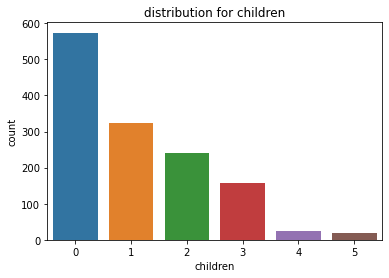

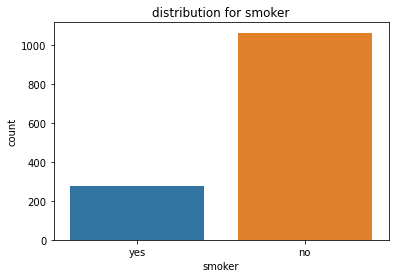

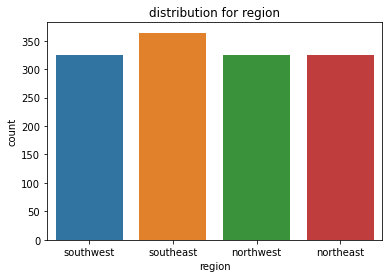

In [22]:
plt.figure(figsize=(10, 5))
cat_feat = ['sex', 'children', 'smoker', 'region']
for i in cat_feat:
    #ins[i].value_counts().plot.bar(color = sns.color_palette('pastel'))
    sns.countplot(x=i, data= ins)
    plt.title(f"distribution for {i}")
    plt.show()
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)


Text(0.5, 1.0, 'Count of smokers by sex')

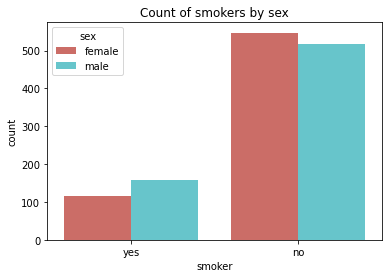

In [23]:
sns.countplot(x='smoker', hue='sex', data=ins, palette='hls').set_title("Count of smokers by sex")

<Figure size 720x360 with 0 Axes>

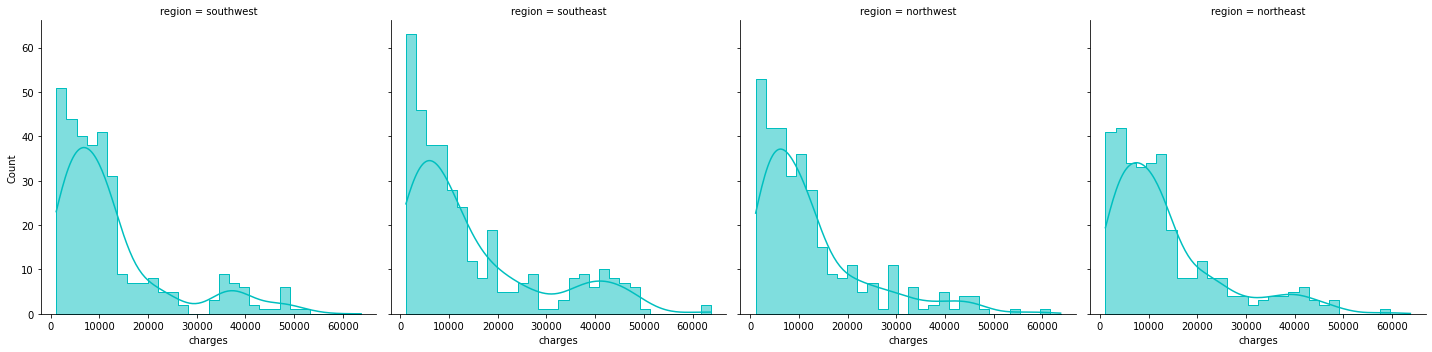

In [24]:
#distribution of charges region wise
plt.figure(figsize=(10,5))
sns.displot(ins, x='charges', col='region' , color='c', element='step', kde=True)


Text(0.5, 1.0, 'Distribution of charges by region')

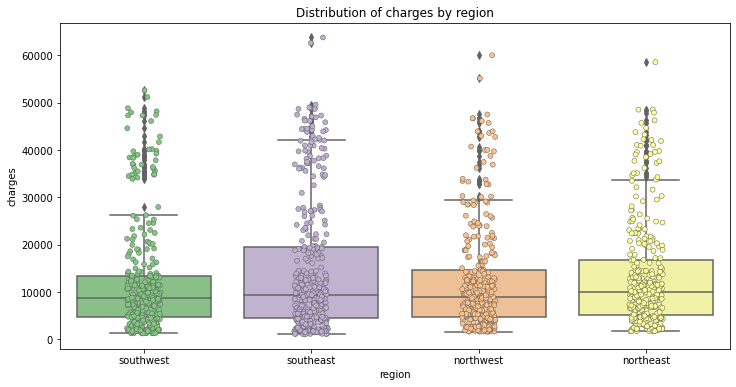

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', palette='Accent', data=ins)
sns.stripplot(x='region', y='charges', palette='Accent', data=ins, linewidth=0.5)
plt.title("Distribution of charges by region")

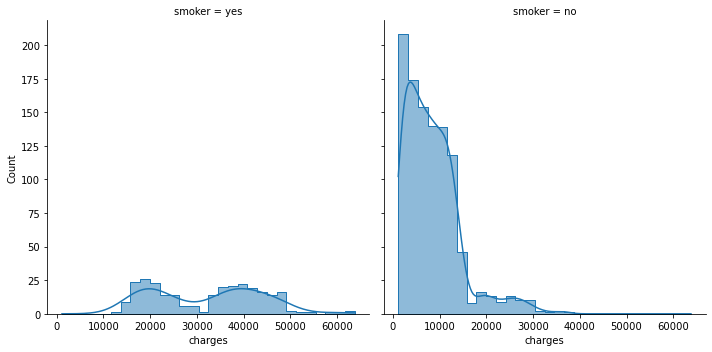

In [26]:
#distribution of charges smoker, non-smoker wise
sns.displot(ins, x='charges', col='smoker', palette='husl', element='step', kde=True)

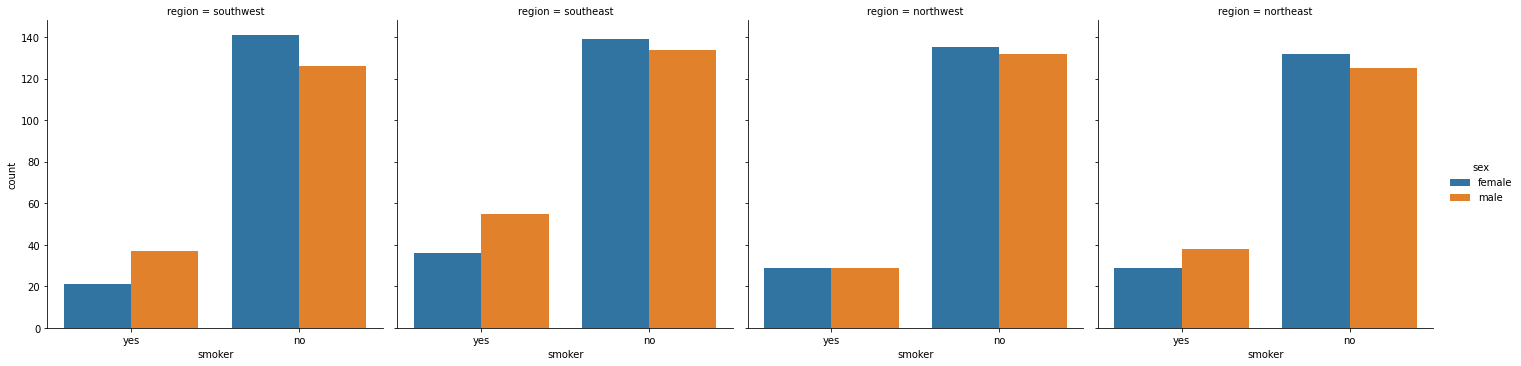

In [27]:
#smokers, non-smokers region wise
sns.catplot(col='region', x='smoker', hue='sex', data=ins, kind='count')
plt.show()

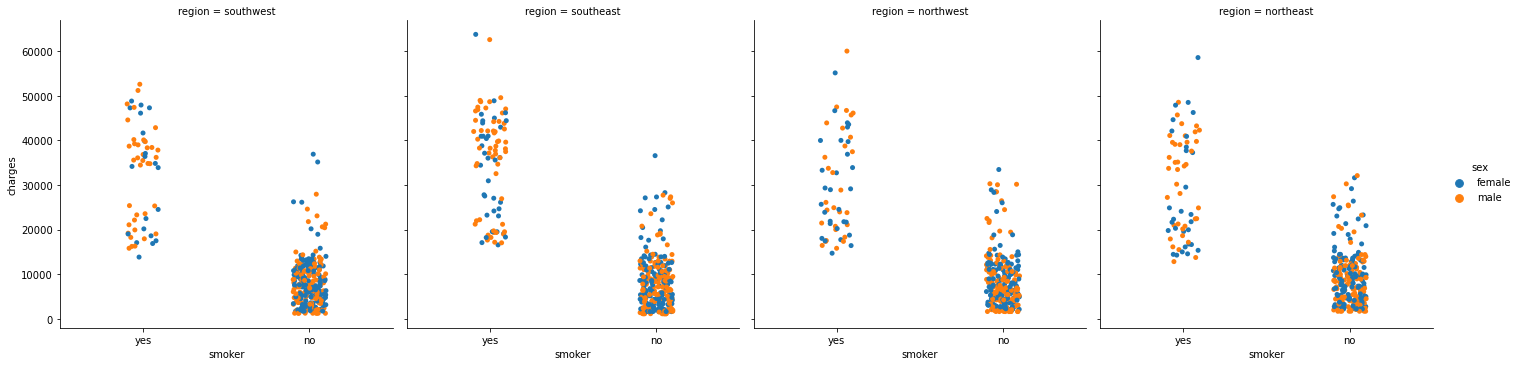

In [30]:
sns.catplot(col='region', x='smoker', y= 'charges', data=ins, hue='sex')

Text(0.5, 1.0, 'Count of smokers by age<=18')

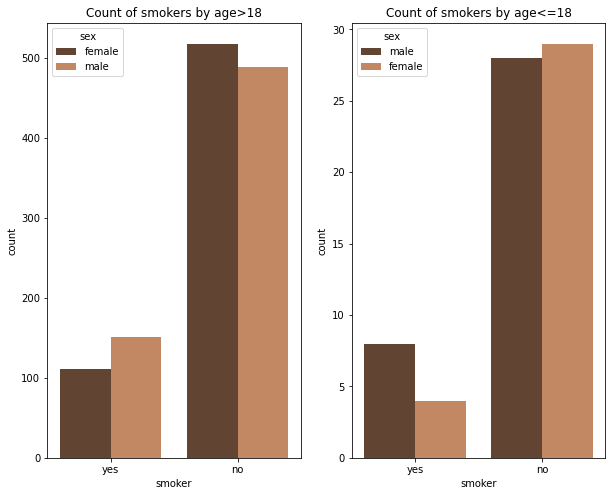

In [31]:
#distribution of smokers vs sex
#age>18, age<=18
fig, ax = plt.subplots(1,2, figsize=(10, 8))
sns.countplot(x='smoker', hue='sex', data=ins.loc[ins['age']>18], orient='v', ax=ax[0], order=['yes', 'no'], palette='copper')
ax[0].set_title("Count of smokers by age>18")
sns.countplot(x='smoker', hue='sex', data=ins.loc[ins['age']<=18], orient='v', ax=ax[1], order=['yes','no'], palette='copper')
ax[1].set_title("Count of smokers by age<=18")

Text(0.5, 1.0, 'distribution of charges for male and female by smokers and non-smokers')

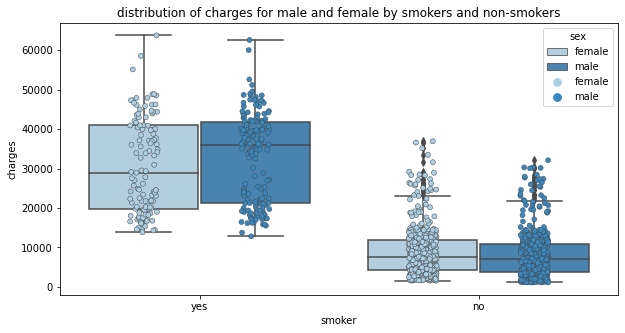

In [32]:
#distribution of charges for male and female smokers and nonsmokers
plt.figure(figsize=(10, 5))
ax= sns.boxplot(x='smoker', y='charges', hue='sex', data=ins, palette='Blues')
ax = sns.stripplot(x='smoker', y='charges', hue='sex', data=ins, palette='Blues', jitter=True, dodge=True, linewidth=0.5)
plt.title('distribution of charges for male and female by smokers and non-smokers')


Text(0.5, 1.0, 'Distribution of charges by no. of children')

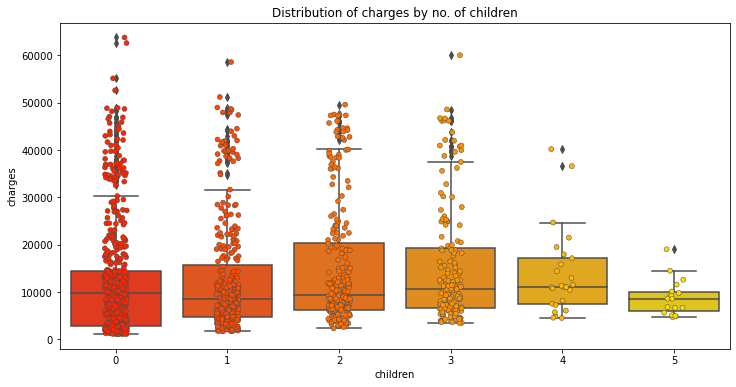

In [33]:
#boxplot for medical charges by number of children
plt.figure(figsize=(12,6))
sns.boxplot(x='children', y='charges', data=ins, palette='autumn')
sns.stripplot(x='children', y='charges', data=ins, palette='autumn', dodge=True, linewidth=0.5)
plt.title("Distribution of charges by no. of children")

Text(0.5, 1.0, 'Distribution of charges with bmi<=30')

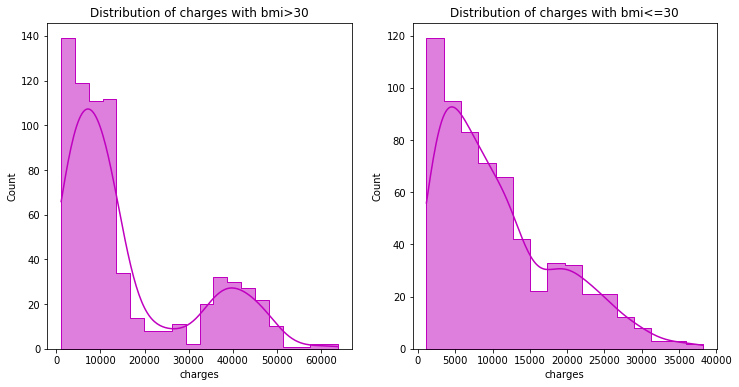

In [34]:
#distribution of charges with bmi >30 and bmi<=30
fig, ax=plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=ins[ins['bmi']>30], x='charges', kde=True, element='step', ax=ax[0], color='m')
ax[0].set_title("Distribution of charges with bmi>30")
sns.histplot(data=ins[ins['bmi']<=30], x='charges', kde=True, element='step', ax=ax[1], color='m')
ax[1].set_title("Distribution of charges with bmi<=30")

In [35]:

ins['sex'] = ins['sex'].replace({'female':0, 'male':1})
ins['smoker'] = ins['smoker'].replace({'yes':1, 'no':0})


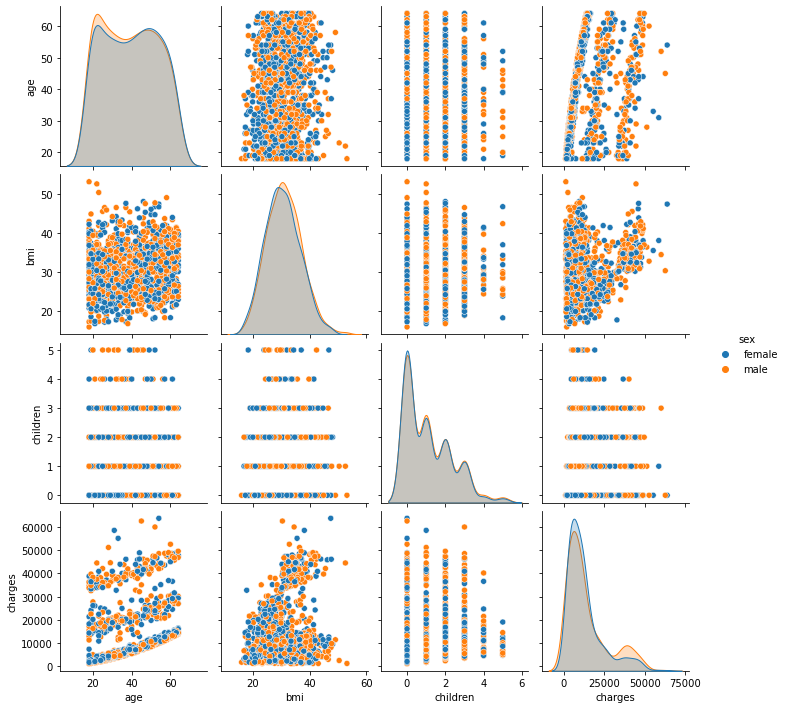

In [41]:
sns.pairplot(ins, hue='sex')

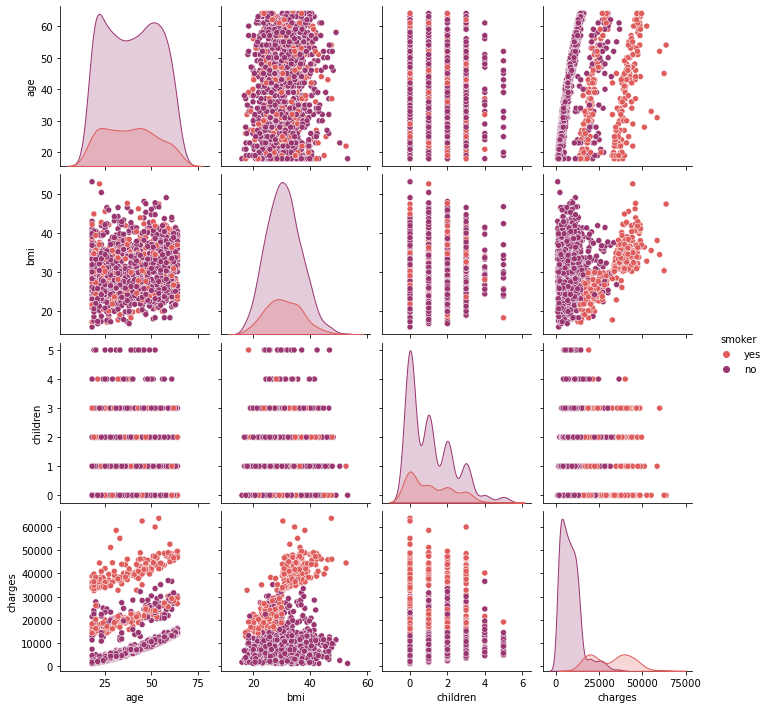

In [42]:
sns.pairplot(ins, hue='smoker', palette='flare')

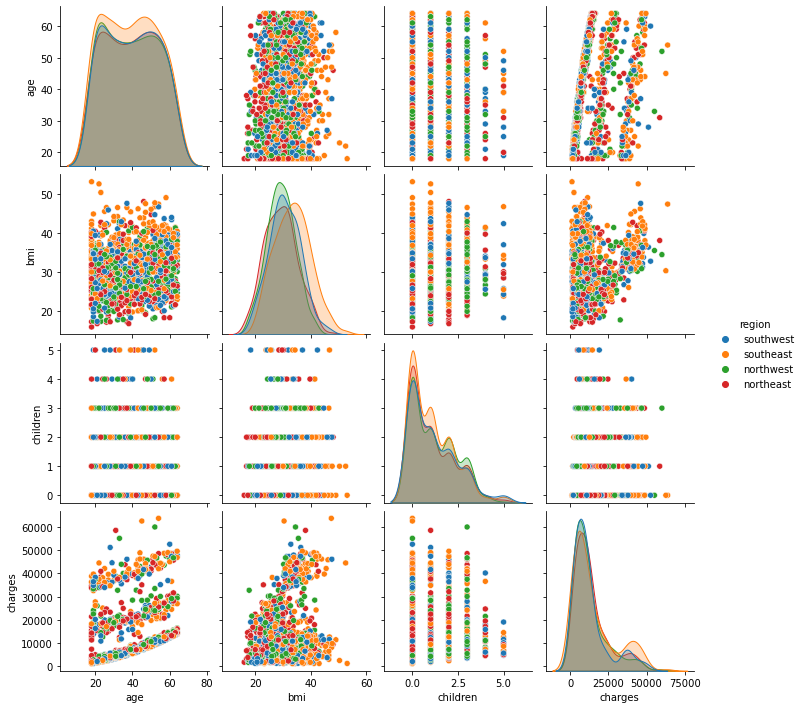

In [44]:
sns.pairplot(ins, hue='region')

## Statistical evidence: Do charges of people who smoke differs significantly from the people who don't
###  H0: Charges are same for people who smoke and people who don't
###  H1: Charges are different for people who smoke and people who don't

In [46]:
smokers = np.array(ins[ins['smoker']=='yes']['charges'])
non_smokers = np.array(ins[ins['smoker']=='no']['charges'])

print(f"Mean charges for smokers: {smokers.mean().round(2)}")
print(f"Mean charges for smokers: {non_smokers.mean().round(2)}")

t, p_value=stats.ttest_ind(smokers, non_smokers, axis=0)
if p_value<=0.05:
    print("We reject Null hypothesis")
    print("Charges for smokers differ significantly from non smokers")
else:
    print("We fail to reject Null hypothesis")
    print("Charges for smokers do not differ significantly from non smokers")

Mean charges for smokers: 32050.23
Mean charges for smokers: 8434.27
We reject Null hypothesis
Charges for smokers differ significantly from non smokers


## Does bmi of males differ significantly from bmi of females

### H0: Bmi of males and females are same
### H1: Bmi of males and females differ significantly from each other

In [51]:
females = np.array(ins[ins['sex']=='female']['bmi'])
males = np.array(ins[ins['sex']=='male']['bmi'])

print(f"Mean bmi for females {females.mean().round(2)}")
print(f"Mean bmi for males {males.mean().round(2)}")

t, p_value = stats.ttest_ind(females, males, axis=0)

if p_value<=0.05:
    print(f"We reject Null hypothesis with p-value {p_value.round(3)}")
    print("Bmi for males differ significantly from females")
else:
    print(f"We fail to reject Null hypothesis with p-value {p_value.round(3)}")
    print("Bmi for males do not differ significantly from females")
    

Mean bmi for females 30.38
Mean bmi for males 30.94
We fail to reject Null hypothesis with p-value0.09
Bmi for males do not differ significantly from females


## Is the proportion of smokers different in different genders

### H0: Proportion of smokers doesn't vary significantly between genders
### H1: Proportion of smokers vary significantly between genders

In [ ]:
female_smokers = insurance[insurance['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insurance[insurance['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = insurance['sex'].value_counts()['female'] # number of females in the data
n_males = insurance['sex'].value_counts()['male'] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])
print(f'Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if p_value < 0.05:
    print(f'With a p-value of {round(p_value, 4)} the difference is significant. aka |We reject the null|')
    print('Proportion of smokers in male and female are not equal.')

else:
    print(f'With a p-value of {round(p_value, 4)} the difference is not significant. aka |We fail to reject the null|')
    print('Proportion of smokers in male and female are equal.')
    

Broader category
Chi-square test is used to compare categorical variables.

H0: Smoker and Gender are independent

H1: Smoker and Gender are not independent

In [ ]:
contingency_table = pd.crosstab(insurance['sex'], insurance['smoker'])
print('Contigency Table:')
display(np.array(contingency_table))

#Observed Values
Observed_Values = contingency_table.values
print('Observed Values:')
display(Observed_Values)

b = stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print('Expected Values:')
display(Expected_Values)
no_of_rows = len(contingency_table.iloc[0:2, 0])

no_of_columns = len(contingency_table.iloc[0, 0:2])

ddof = (no_of_rows - 1)*(no_of_columns - 1) #degree of freedom

alpha = 0.05 #alpha value

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)]) #chi square

chi_square_statistic = chi_square[0] + chi_square[1] #chi square statistic

critical_value = chi2.ppf(q = 1-alpha, df = ddof) #critical value

p_value = 1-chi2.cdf(x = chi_square_statistic,df = ddof) #p-value
print('Significance level: ', alpha)
print('Degree of Freedom: ', ddof)
print('chi-square statistic: ', chi_square_statistic)
print('critical_value: ', critical_value)
print('p-value: ', p_value)
if chi_square_statistic >= critical_value:
    print('Reject H0, there is a relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are independent.')
    
else:
    print('Fail to reject H0, there is no relationship between 2 categorical variables based on critical values.')
    print('Proportion of Smokers and Gender are not independent.')
    
if p_value <= alpha:
    print('Reject H0, there is a relationship between 2 categorical variables based on p-values.')
    print('Proportion of Smokers and Gender are independent.')

else:
    print('Fail to reject H0, there is no relationship between 2 categorical variables based on p-values.')
    print('Proportion of Smokers and Gender are not independent.')

Statistical evidence: Is the distribution of bmi across women with no children, one child and two children, the same?
ANOVA, also known as analysis of variance, is used to compare multiple (three or more) samples with a single test. There are 2 major flavors of ANOVA

One-way ANOVA: It is used to compare the difference between the three or more samples/groups of a single independent variable.
MANOVA: MANOVA allows us to test the effect of one or more independent variable on two or more dependent variables. In addition, MANOVA can also detect the difference in co-relation between dependent variables given the groups of independent variables.
The hypothesis being tested in ANOVA is

H0: All pairs of samples are same i.e. all sample means are equal
H1: At least one pair of samples is significantly different

In [ ]:
anova = insurance[['bmi', 'sex', 'children']].copy()
anova = anova[anova['sex'] == 'female']
anova.drop('sex', axis = 1, inplace = True)

anova = anova.loc[(anova['children'] == 0) | (anova['children'] == 1) | (anova['children'] == 2)]
anova['children'] = anova['children'].replace({0: 'No Child', 1: '1 Child', 2: '2 Child'})
anova = anova.reset_index(drop = True)

groups = anova.groupby('children').groups

no_child = anova['bmi'][groups['No Child']]
one_child = anova['bmi'][groups['1 Child']]
two_child = anova['bmi'][groups['2 Child']]

# Perform the ANOVA
stats.f_oneway(no_child, one_child, two_child)
# Another way
model = ols('bmi ~ children', data = anova).fit()
print(model.summary())
# ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
# Visualizing
fig, ax_hist = plt.subplots(figsize = (12.8, 6))

sns.distplot(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 0)]['bmi'], 
             color = 'orange', hist = False, label = 'No Child')
ax_hist.axvline(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 0)]['bmi'].mean(), 
                color = 'orange', linestyle = '--', label = 'No Child Mean')

sns.distplot(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 1)]['bmi'], 
             color = 'green', hist = False, label = '1 Child')
ax_hist.axvline(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 1)]['bmi'].mean(), 
                color = 'green', linestyle = '--', label = '1 Child Mean')

sns.distplot(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 2)]['bmi'], 
             color = 'blue', hist = False, label = '2 Child')
ax_hist.axvline(insurance[(insurance['sex'] == 'female') & (insurance['children'] == 2)]['bmi'].mean(), 
                color = 'blue', linestyle = '--', label = '2 Child Mean')

plt.suptitle('Distribution of BMI of Female with 0, 1, 2 Children'); plt.legend(); plt.show()
